In [ ]:
import matplotlib as mpl
print(mpl.get_cachedir())

C:\Users\user\.matplotlib


In [6]:
import matplotlib.font_manager as fm

for f in fm.findSystemFonts(fontpaths=None):
    if "Nanum" in f or "나눔" in f:
        print(f)


C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\NanumGothicCoding.ttf
C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\NanumGothicCoding-Bold.ttf
C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\NanumGothic.ttf


현재 폰트: NanumGothicCoding


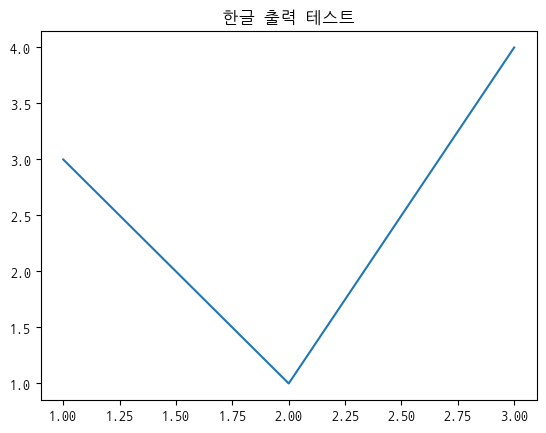

In [9]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# ↓ 다운로드한 나눔고딕 폰트 경로 설정 (수정 가능)
font_path = "C:/Users/user/AppData/Local/Microsoft/Windows/Fonts/NanumGothicCoding.ttf"
fontprop = fm.FontProperties(fname=font_path)
font_name = fontprop.get_name()

# matplotlib 기본 설정에 폰트 등록
plt.rcParams["font.family"] = font_name
plt.rcParams["axes.unicode_minus"] = False

# 캐시 강제 갱신
# fm._rebuild()  # 이거로 강제로 fontlist 생성
print("현재 폰트:", font_name)

# 테스트
plt.title("한글 출력 테스트")
plt.plot([1, 2, 3], [3, 1, 4])
plt.show()


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

plt.rcParams["axes.unicode_minus"] = False
plt.rc("font", family="NanumGothic")

df = pd.read_csv("../../data/seoul_apart_2022.csv")
df.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,"220,000",4,1987.0,언주로 3,NaN,중개거래,서울 강남구
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,"220,000",2,1987.0,언주로 3,NaN,중개거래,서울 강남구
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,"216,000",2,1987.0,언주로 3,NaN,중개거래,서울 강남구
3,서울특별시 강남구 개포동,1282,1282.0,0.0,개포래미안포레스트,102.32,202204,1,"369,000",13,2020.0,개포로 264,NaN,중개거래,"서울 강남구, 서울 양천구"
4,서울특별시 강남구 개포동,1282,1282.0,0.0,개포래미안포레스트,136.06,202205,2,"420,000",17,2020.0,개포로 264,NaN,중개거래,서울 강남구


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       12684 non-null  object 
 1   번지        12681 non-null  object 
 2   본번        12682 non-null  float64
 3   부번        12682 non-null  float64
 4   단지명       12684 non-null  object 
 5   전용면적(㎡)   12684 non-null  float64
 6   계약년월      12684 non-null  int64  
 7   계약일       12684 non-null  int64  
 8   거래금액(만원)  12651 non-null  object 
 9   층         12684 non-null  int64  
 10  건축년도      12682 non-null  float64
 11  도로명       12684 non-null  object 
 12  해제사유발생일   715 non-null    float64
 13  거래유형      12684 non-null  object 
 14  중개사소재지    12684 non-null  object 
dtypes: float64(5), int64(3), object(7)
memory usage: 1.5+ MB


<AxesSubplot:>

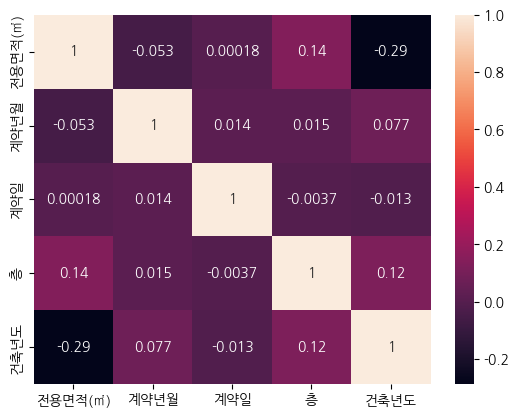

In [ ]:
pearson_corr = df.corr() # 수치형 데이터만 

sns.heatmap(data = pearson_corr, annot = True)

In [13]:
# 불필요한 컬럼 삭제 
df.drop(['해제사유발생일','중개사소재지','번지','본번','부번','도로명','거래유형'], axis=1, inplace = True) 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       12684 non-null  object 
 1   단지명       12684 non-null  object 
 2   전용면적(㎡)   12684 non-null  float64
 3   계약년월      12684 non-null  int64  
 4   계약일       12684 non-null  int64  
 5   거래금액(만원)  12651 non-null  object 
 6   층         12684 non-null  int64  
 7   건축년도      12682 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 792.9+ KB


In [21]:
df.isnull().sum()

시군구          0
단지명          0
전용면적(㎡)      0
계약년월         0
계약일          0
거래금액(만원)    33
층            0
건축년도         2
dtype: int64

In [20]:
df = df.rename(columns = {"전용면적(㎡)":"전용면적"})
df.head()

,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,"220,000",4,1987.0,언주로 3,NaN,중개거래,서울 강남구
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,"220,000",2,1987.0,언주로 3,NaN,중개거래,서울 강남구
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,"216,000",2,1987.0,언주로 3,NaN,중개거래,서울 강남구
3,서울특별시 강남구 개포동,1282,1282.0,0.0,개포래미안포레스트,102.32,202204,1,"369,000",13,2020.0,개포로 264,NaN,중개거래,"서울 강남구, 서울 양천구"
4,서울특별시 강남구 개포동,1282,1282.0,0.0,개포래미안포레스트,136.06,202205,2,"420,000",17,2020.0,개포로 264,NaN,중개거래,서울 강남구


In [21]:
# 시군구 분리하기
df['구'] = df['시군구'].apply(lambda e: e.split()[1])
df['동'] = df['시군구'].apply(lambda e: e.split()[2])
df.head()

,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,구,동
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,"220,000",4,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,"220,000",2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,"216,000",2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동
3,서울특별시 강남구 개포동,1282,1282.0,0.0,개포래미안포레스트,102.32,202204,1,"369,000",13,2020.0,개포로 264,NaN,중개거래,"서울 강남구, 서울 양천구",강남구,개포동
4,서울특별시 강남구 개포동,1282,1282.0,0.0,개포래미안포레스트,136.06,202205,2,"420,000",17,2020.0,개포로 264,NaN,중개거래,서울 강남구,강남구,개포동


In [22]:
# 전용면적에 따라 구간을 나누어 아파트 유형 분류

def category(e):
  if e <= 60:
    return "소형"
  elif e <= 85:
    return "중형"
  elif e<=102:
    return "중대형"
  else:
    return "대형"
  
df['유형'] = df['전용면적'].apply(category)
df.head()

,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,구,동,유형
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,"220,000",4,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,중형
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,"220,000",2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,중형
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,"216,000",2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,중형
3,서울특별시 강남구 개포동,1282,1282.0,0.0,개포래미안포레스트,102.32,202204,1,"369,000",13,2020.0,개포로 264,NaN,중개거래,"서울 강남구, 서울 양천구",강남구,개포동,대형
4,서울특별시 강남구 개포동,1282,1282.0,0.0,개포래미안포레스트,136.06,202205,2,"420,000",17,2020.0,개포로 264,NaN,중개거래,서울 강남구,강남구,개포동,대형


In [23]:
df["계약일"]=df["계약년월"].astype('str') + df["계약일"].astype(str)
df.head()
# df["계약일"] = pd.to_datetime(df["계약일"], format='%Y%m%d')

,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,구,동,유형
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,20220412,"220,000",4,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,중형
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,20220421,"220,000",2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,중형
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,20220527,"216,000",2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,중형
3,서울특별시 강남구 개포동,1282,1282.0,0.0,개포래미안포레스트,102.32,202204,2022041,"369,000",13,2020.0,개포로 264,NaN,중개거래,"서울 강남구, 서울 양천구",강남구,개포동,대형
4,서울특별시 강남구 개포동,1282,1282.0,0.0,개포래미안포레스트,136.06,202205,2022052,"420,000",17,2020.0,개포로 264,NaN,중개거래,서울 강남구,강남구,개포동,대형


In [24]:
# pandas의 datetime 타입으로 변환
df["계약일"] = pd.to_datetime(df['계약일'], format = "%Y%m%d")
df.head()

,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,구,동,유형
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,2022-04-12,"220,000",4,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,중형
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,2022-04-21,"220,000",2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,중형
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,2022-05-27,"216,000",2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,중형
3,서울특별시 강남구 개포동,1282,1282.0,0.0,개포래미안포레스트,102.32,202204,2022-04-01,"369,000",13,2020.0,개포로 264,NaN,중개거래,"서울 강남구, 서울 양천구",강남구,개포동,대형
4,서울특별시 강남구 개포동,1282,1282.0,0.0,개포래미안포레스트,136.06,202205,2022-05-02,"420,000",17,2020.0,개포로 264,NaN,중개거래,서울 강남구,강남구,개포동,대형


In [29]:
# datetime의 dt.month, dt.dayofweek 속성을 이용하여 "계약월", "계약요일"로 분할 
df['계약월'] = df['계약일'].dt.month 
df['계약요일'] = df['계약일'].dt.dayofweek # 일주일, 인덱스 0부터

# map함수와 dictionary를 활용하여 인코딩 
date_mapping = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
df['계약요일'] = df['계약요일'].map(date_mapping)

df.head()

,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,구,동,유형,계약월,계약요일
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,2022-04-12,"220,000",4,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,중형,4,화
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,2022-04-21,"220,000",2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,중형,4,목
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,2022-05-27,"216,000",2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,중형,5,금
3,서울특별시 강남구 개포동,1282,1282.0,0.0,개포래미안포레스트,102.32,202204,2022-04-01,"369,000",13,2020.0,개포로 264,NaN,중개거래,"서울 강남구, 서울 양천구",강남구,개포동,대형,4,금
4,서울특별시 강남구 개포동,1282,1282.0,0.0,개포래미안포레스트,136.06,202205,2022-05-02,"420,000",17,2020.0,개포로 264,NaN,중개거래,서울 강남구,강남구,개포동,대형,5,월


금    2133
목    1742
수    2197
월    1817
일     484
토    2454
화    1824
Name: 계약요일, dtype: int64


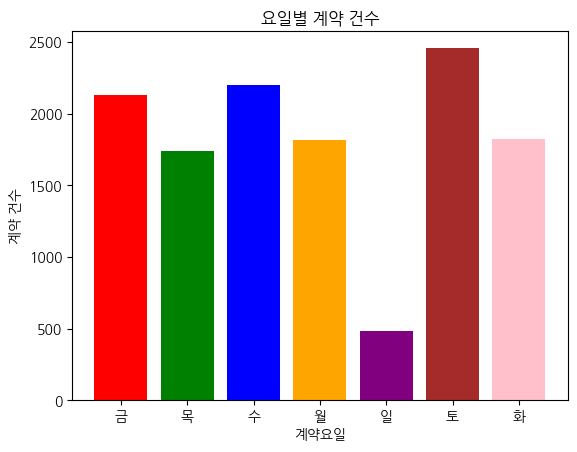

In [86]:
# 요일별 계약건수 
counts = df["계약요일"].value_counts().sort_index()
print(counts)

# 시각화
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink']  

plt.bar(x=counts.index, height=counts.values, color=colors)
plt.xlabel("계약요일")
plt.ylabel("계약 건수")
plt.title("요일별 계약 건수")
plt.show()

In [ ]:
# 요일을 정렬해서 다시 시각화 
counts = df["계약요일"].value_counts()
# counts.index
weekday_order = ['월', '화', '수', '목', '금', '토', '일']

# counts를 요일 순서로 재정렬
counts = counts.reindex(weekday_order)
print(counts, type(counts))

월    1817
화    1824
수    2197
목    1742
금    2133
토    2454
일     484
Name: 계약요일, dtype: int64 <class 'pandas.core.series.Series'>


In [99]:
counts_dict = counts.to_dict()
counts_dict

{'월': 1817, '화': 1824, '수': 2197, '목': 1742, '금': 2133, '토': 2454, '일': 484}

In [101]:
df['요일별_계약건수'] = df['계약요일'].map(counts_dict)
df.head()

,시군구,번지,본번,부번,단지명,전용면적(평),계약년월,계약일,거래금액(만원),층,...,거래유형,중개사소재지,구,동,유형,계약월,계약요일,평당금액,계약건수,요일별_계약건수
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,24.23,202204,2022-04-12,220000,4,...,중개거래,서울 강남구,강남구,개포동,중형,4,화,9079.65,NaN,1824
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,24.23,202204,2022-04-21,220000,2,...,중개거래,서울 강남구,강남구,개포동,중형,4,목,9079.65,NaN,1742
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,24.23,202205,2022-05-27,216000,2,...,중개거래,서울 강남구,강남구,개포동,중형,5,금,8914.57,NaN,2133
3,서울특별시 강남구 개포동,1282,1282.0,0.0,개포래미안포레스트,31.01,202204,2022-04-01,369000,13,...,중개거래,"서울 강남구, 서울 양천구",강남구,개포동,대형,4,금,11899.39,NaN,2133
4,서울특별시 강남구 개포동,1282,1282.0,0.0,개포래미안포레스트,41.23,202205,2022-05-02,420000,17,...,중개거래,서울 강남구,강남구,개포동,대형,5,월,10186.76,NaN,1817


<AxesSubplot:xlabel='계약요일', ylabel='요일별_계약건수'>

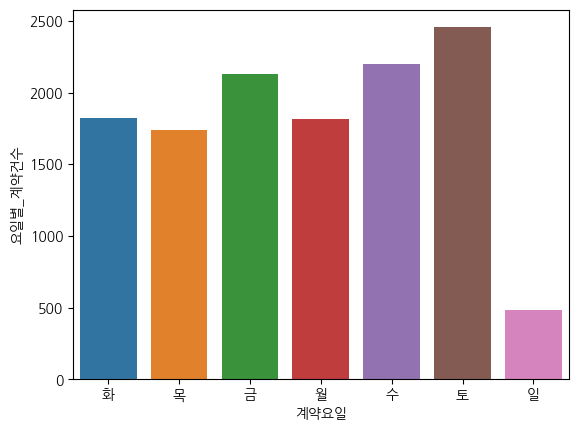

In [103]:
sns.barplot(data = df, x = "계약요일", y = "요일별_계약건수")

In [30]:
df.isnull().sum()

시군구             0
번지              3
본번              2
부번              2
단지명             0
전용면적            0
계약년월            0
계약일             0
거래금액(만원)       33
층               0
건축년도            2
도로명             0
해제사유발생일     11969
거래유형            0
중개사소재지          0
구               0
동               0
유형              0
계약월             0
계약요일            0
dtype: int64

In [31]:
df.dropna(subset = ["거래금액(만원)"], inplace = True) # ignore_index 인자 삭제됨
df.reset_index(drop=True, inplace=True)# 인덱스 초기화

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12651 entries, 0 to 12650
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   시군구       12651 non-null  object        
 1   번지        12648 non-null  object        
 2   본번        12649 non-null  float64       
 3   부번        12649 non-null  float64       
 4   단지명       12651 non-null  object        
 5   전용면적      12651 non-null  float64       
 6   계약년월      12651 non-null  int64         
 7   계약일       12651 non-null  datetime64[ns]
 8   거래금액(만원)  12651 non-null  object        
 9   층         12651 non-null  int64         
 10  건축년도      12649 non-null  float64       
 11  도로명       12651 non-null  object        
 12  해제사유발생일   714 non-null    float64       
 13  거래유형      12651 non-null  object        
 14  중개사소재지    12651 non-null  object        
 15  구         12651 non-null  object        
 16  동         12651 non-null  object        
 17  유형        12

In [33]:
# 거래금액(만원)이 지금 object이므로 numeric으로 변환
# str.replace("기존 문자","변경 문자")
df['거래금액(만원)'] = df['거래금액(만원)'].str.replace(",","") # , 제거
df['거래금액(만원)'] = pd.to_numeric(df['거래금액(만원)'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12651 entries, 0 to 12650
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   시군구       12651 non-null  object        
 1   번지        12648 non-null  object        
 2   본번        12649 non-null  float64       
 3   부번        12649 non-null  float64       
 4   단지명       12651 non-null  object        
 5   전용면적      12651 non-null  float64       
 6   계약년월      12651 non-null  int64         
 7   계약일       12651 non-null  datetime64[ns]
 8   거래금액(만원)  12651 non-null  int64         
 9   층         12651 non-null  int64         
 10  건축년도      12649 non-null  float64       
 11  도로명       12651 non-null  object        
 12  해제사유발생일   714 non-null    float64       
 13  거래유형      12651 non-null  object        
 14  중개사소재지    12651 non-null  object        
 15  구         12651 non-null  object        
 16  동         12651 non-null  object        
 17  유형        12

In [73]:
df["전용면적"] = round(df["전용면적"]/3.3, 2) 
df=df.rename(columns={"전용면적":"전용면적(평)"})

df.head()

KeyError: '전용면적'

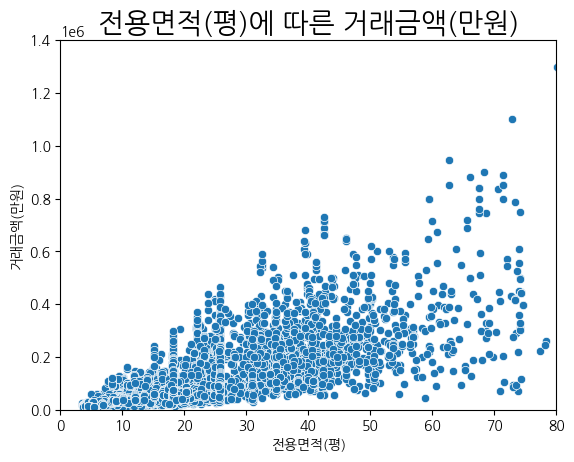

In [ ]:
## 면적에 따른 거래금액(만원)
sns.scatterplot(data = df, x= "전용면적(평)", y = "거래금액(만원)")
plt.xlim(0, 80)
# plt.ylim(0,1.2) # 10e6승으로 나눈 상태이므로 오류 
plt.ylim(0, 1.4 * 1e6)
plt.title("전용면적(평)에 따른 거래금액(만원)", fontsize = 20)

plt.show() # 전용면적(평)에 따라 거래금액이 비례한다. 

In [35]:
df['평당금액'] = df['거래금액(만원)'] / df['전용면적(평)']
df["평당금액"]=round(df["평당금액"],2) # 소수점 둘째자리 반올림
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12651 entries, 0 to 12650
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   시군구       12651 non-null  object        
 1   번지        12648 non-null  object        
 2   본번        12649 non-null  float64       
 3   부번        12649 non-null  float64       
 4   단지명       12651 non-null  object        
 5   전용면적(평)   12651 non-null  float64       
 6   계약년월      12651 non-null  int64         
 7   계약일       12651 non-null  datetime64[ns]
 8   거래금액(만원)  12651 non-null  int64         
 9   층         12651 non-null  int64         
 10  건축년도      12649 non-null  float64       
 11  도로명       12651 non-null  object        
 12  해제사유발생일   714 non-null    float64       
 13  거래유형      12651 non-null  object        
 14  중개사소재지    12651 non-null  object        
 15  구         12651 non-null  object        
 16  동         12651 non-null  object        
 17  유형        12

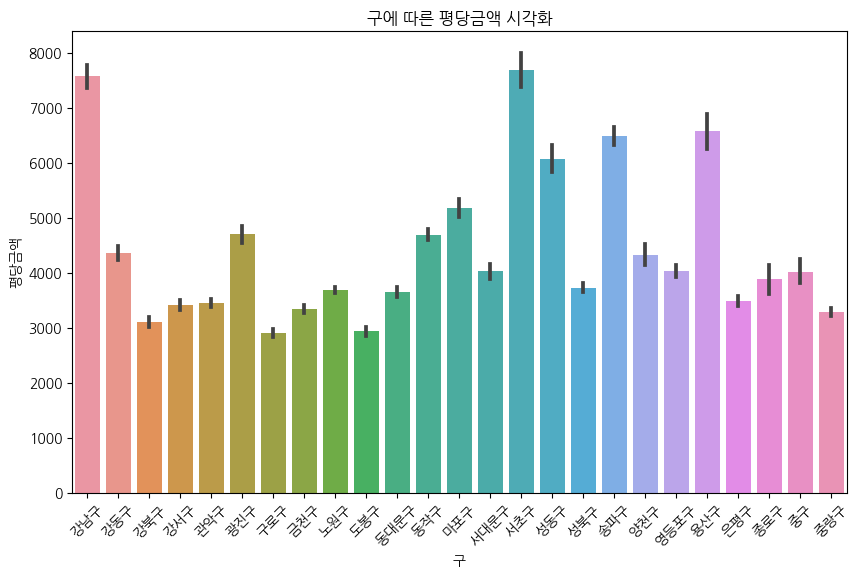

In [45]:
# 구에 따른 평당금액 시각화

plt.figure(figsize = (10,6))
sns.barplot(data = df, x = "구", y = "평당금액")
plt.ylabel("평당금액")
plt.xticks(rotation = 45) # x축 명칭이 중복되므로 rotation 
plt.title("구에 따른 평당금액 시각화")

plt.show()

In [47]:
# 서초구의 동 중 평당금액 평균이 2번째로 높은 동

#df.groupby('구')[["평당금액"]].mean() # 구별 평당금액
seocho = df.groupby(["구","동"])[["평당금액"]].mean().loc['서초구'].sort_values(by = "평당금액", ascending = False) # 집계함수 붙이면 DataFrame으로 반환
seocho

,평당금액
동,
반포동,12392.411218
잠원동,10398.817979
내곡동,6149.430000
신원동,6121.855000
방배동,5595.841667
서초동,5454.335684
우면동,5203.296296
양재동,4092.363846


In [48]:
# 다른 방법으로도 구할 수 있음
df[df["구"]=="서초구"].groupby("동")["평당금액"].mean().sort_values(ascending=False)

동
반포동    12392.411218
잠원동    10398.817979
내곡동     6149.430000
신원동     6121.855000
방배동     5595.841667
서초동     5454.335684
우면동     5203.296296
양재동     4092.363846
Name: 평당금액, dtype: float64

In [56]:
seocho.index

Index(['반포동', '잠원동', '내곡동', '신원동', '방배동', '서초동', '우면동', '양재동'], dtype='object', name='동')

In [ ]:
seocho.reset_index()

,동,평당금액
0,반포동,12392.411218
1,잠원동,10398.817979
2,내곡동,6149.430000
3,신원동,6121.855000
4,방배동,5595.841667
5,서초동,5454.335684
6,우면동,5203.296296
7,양재동,4092.363846


Text(0.5, 1.0, '서초구 동별 평당금액 시각화')

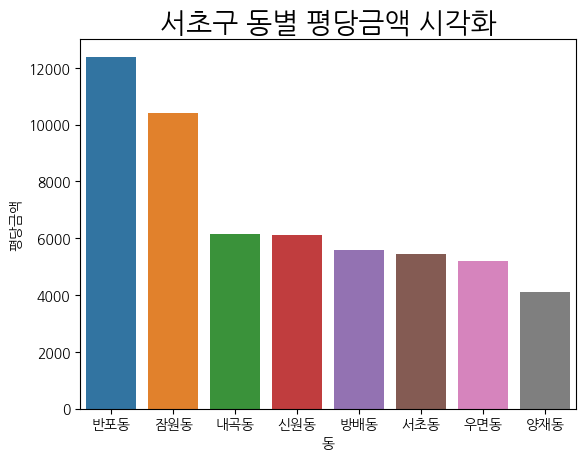

In [55]:
# 서초구의 동별 평당금액 시각화 
seocho_df = seocho.reset_index()
sns.barplot(data = seocho_df, x = "동", y = "평당금액")
plt.title("서초구 동별 평당금액 시각화", fontsize = 20)


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12651 entries, 0 to 12650
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   시군구       12651 non-null  object        
 1   번지        12648 non-null  object        
 2   본번        12649 non-null  float64       
 3   부번        12649 non-null  float64       
 4   단지명       12651 non-null  object        
 5   전용면적(평)   12651 non-null  float64       
 6   계약년월      12651 non-null  int64         
 7   계약일       12651 non-null  datetime64[ns]
 8   거래금액(만원)  12651 non-null  int64         
 9   층         12651 non-null  int64         
 10  건축년도      12649 non-null  float64       
 11  도로명       12651 non-null  object        
 12  해제사유발생일   714 non-null    float64       
 13  거래유형      12651 non-null  object        
 14  중개사소재지    12651 non-null  object        
 15  구         12651 non-null  object        
 16  동         12651 non-null  object        
 17  유형        12

In [71]:
seocho_df = df[df["구"]=="서초구"].groupby("동").agg({
  "평당금액":"mean",
  "단지명":"first"
})

# 가장 비싼 아파트 가격 
high_price = seocho_df.sort_values(by = "평당금액", ascending = False).iloc[0]
high_price.values[0]

12392.411217948717